# Plotnine import, theme, and example plots

In [1]:
# import plotnine
from plotnine import \
    ggplot, aes, theme, themes, element_blank, element_line, element_text, mapping, \
    geom_point, geom_jitter, geom_line, geom_bar, geom_boxplot, geom_violin, geom_histogram, \
    ggtitle, xlab, ylab, geom_vline, geom_hline, \
    scale_x_discrete, scale_y_discrete, scale_x_continuous, scale_y_continuous, \
    scale_color_discrete, scale_color_manual, scale_fill_manual, \
    xlim, ylim
from plotnine.options import figure_size

# https://github.com/ponnhide/patchworklib
import patchworklib as pw
import numpy as np

<Figure size 100x100 with 0 Axes>

In [2]:
# plotnine theme

def theme_tufte_func(base_size=19, base_family="sans", rotate=True, figure_size=None):
    ''' Plotnine plotting theme. '''
    thm = themes.theme_bw(base_size=base_size, base_family = base_family) + \
        theme(
            legend_background = element_blank(),
            legend_key = element_blank(),
            panel_background = element_blank(),
            panel_border = element_blank(),
            strip_background = element_blank(),
            plot_background = element_blank(),
            panel_grid = element_blank(),
            axis_line = element_line(colour = "black", size = 1),
            axis_text_y = element_text(colour = "black")
        )

    if rotate:
        thm += theme(axis_text_x=element_text(rotation=45, hjust=1))
    if figure_size is not None:
        thm += theme(figure_size=figure_size)

    return thm


In [3]:
# Generate example data
import numpy as np
import pandas as pd

mu, sigma = 0, 0.1
x = np.random.normal(mu, sigma, 1000)
y = np.random.normal(mu+0.2, sigma, 1000)
z = np.random.chisquare(1, 1000)

classes = ['a','b','c','d']
data = pd.DataFrame(zip(x,y,z), columns=('x','y','z'))
data['class'] = classes * (1000//4)
data

# order
data['class'] = pd.Categorical(data['class'], categories=classes[::-1])


In [4]:
# colors
colors = ['#a6611a', '#dfc27d', '#80cdc1', '#018571']
color_dict = dict(zip(classes, colors))

In [5]:
# Example scatter plots
p1 = (
    ggplot(data, aes(x='x', y='y', color='class')) +
    geom_point(stat="identity", alpha=0.8) +
    ggtitle("Title") +
    xlab("x-lab") +
    ylab("y-lab") +
    scale_color_manual(color_dict, guide=False) +
    #xlim(-0.5, 0.5) +
    #ylim(-0.5, 0.5) +
    theme_tufte_func(base_size=20, rotate=False)
)

p2 = (
    ggplot(data, aes(x='x', y='z', color='class')) +
    geom_point(stat="identity", alpha=0.8) +
    ggtitle("Title") +
    xlab("x-lab") +
    ylab("y-lab") +
    scale_color_manual(color_dict) +
    #xlim(-0.5, 0.5) +
    #ylim(-0.5, 0.5) +
    theme_tufte_func(base_size=20, rotate=False)
)


# Example histograms
p3 = (
    ggplot(data, aes(x='x')) +
    geom_histogram(binwidth=0.05) +
    ggtitle("Title") +
    xlab("x-lab") +
    ylab("Freq") +
    theme_tufte_func(base_size=20, rotate=False)
)

p4 = (
    ggplot(data, aes(x='z')) +
    geom_histogram(bins=8) +
    ggtitle("Title") +
    xlab("x-lab") +
    ylab("Freq") +
    scale_x_continuous(      # modify x-axis tick marks
        breaks=np.linspace(0, 15, 8),
        labels=list(np.linspace(12_000, 19_000, 8))) +
    theme_tufte_func(base_size=20, rotate=True)
)



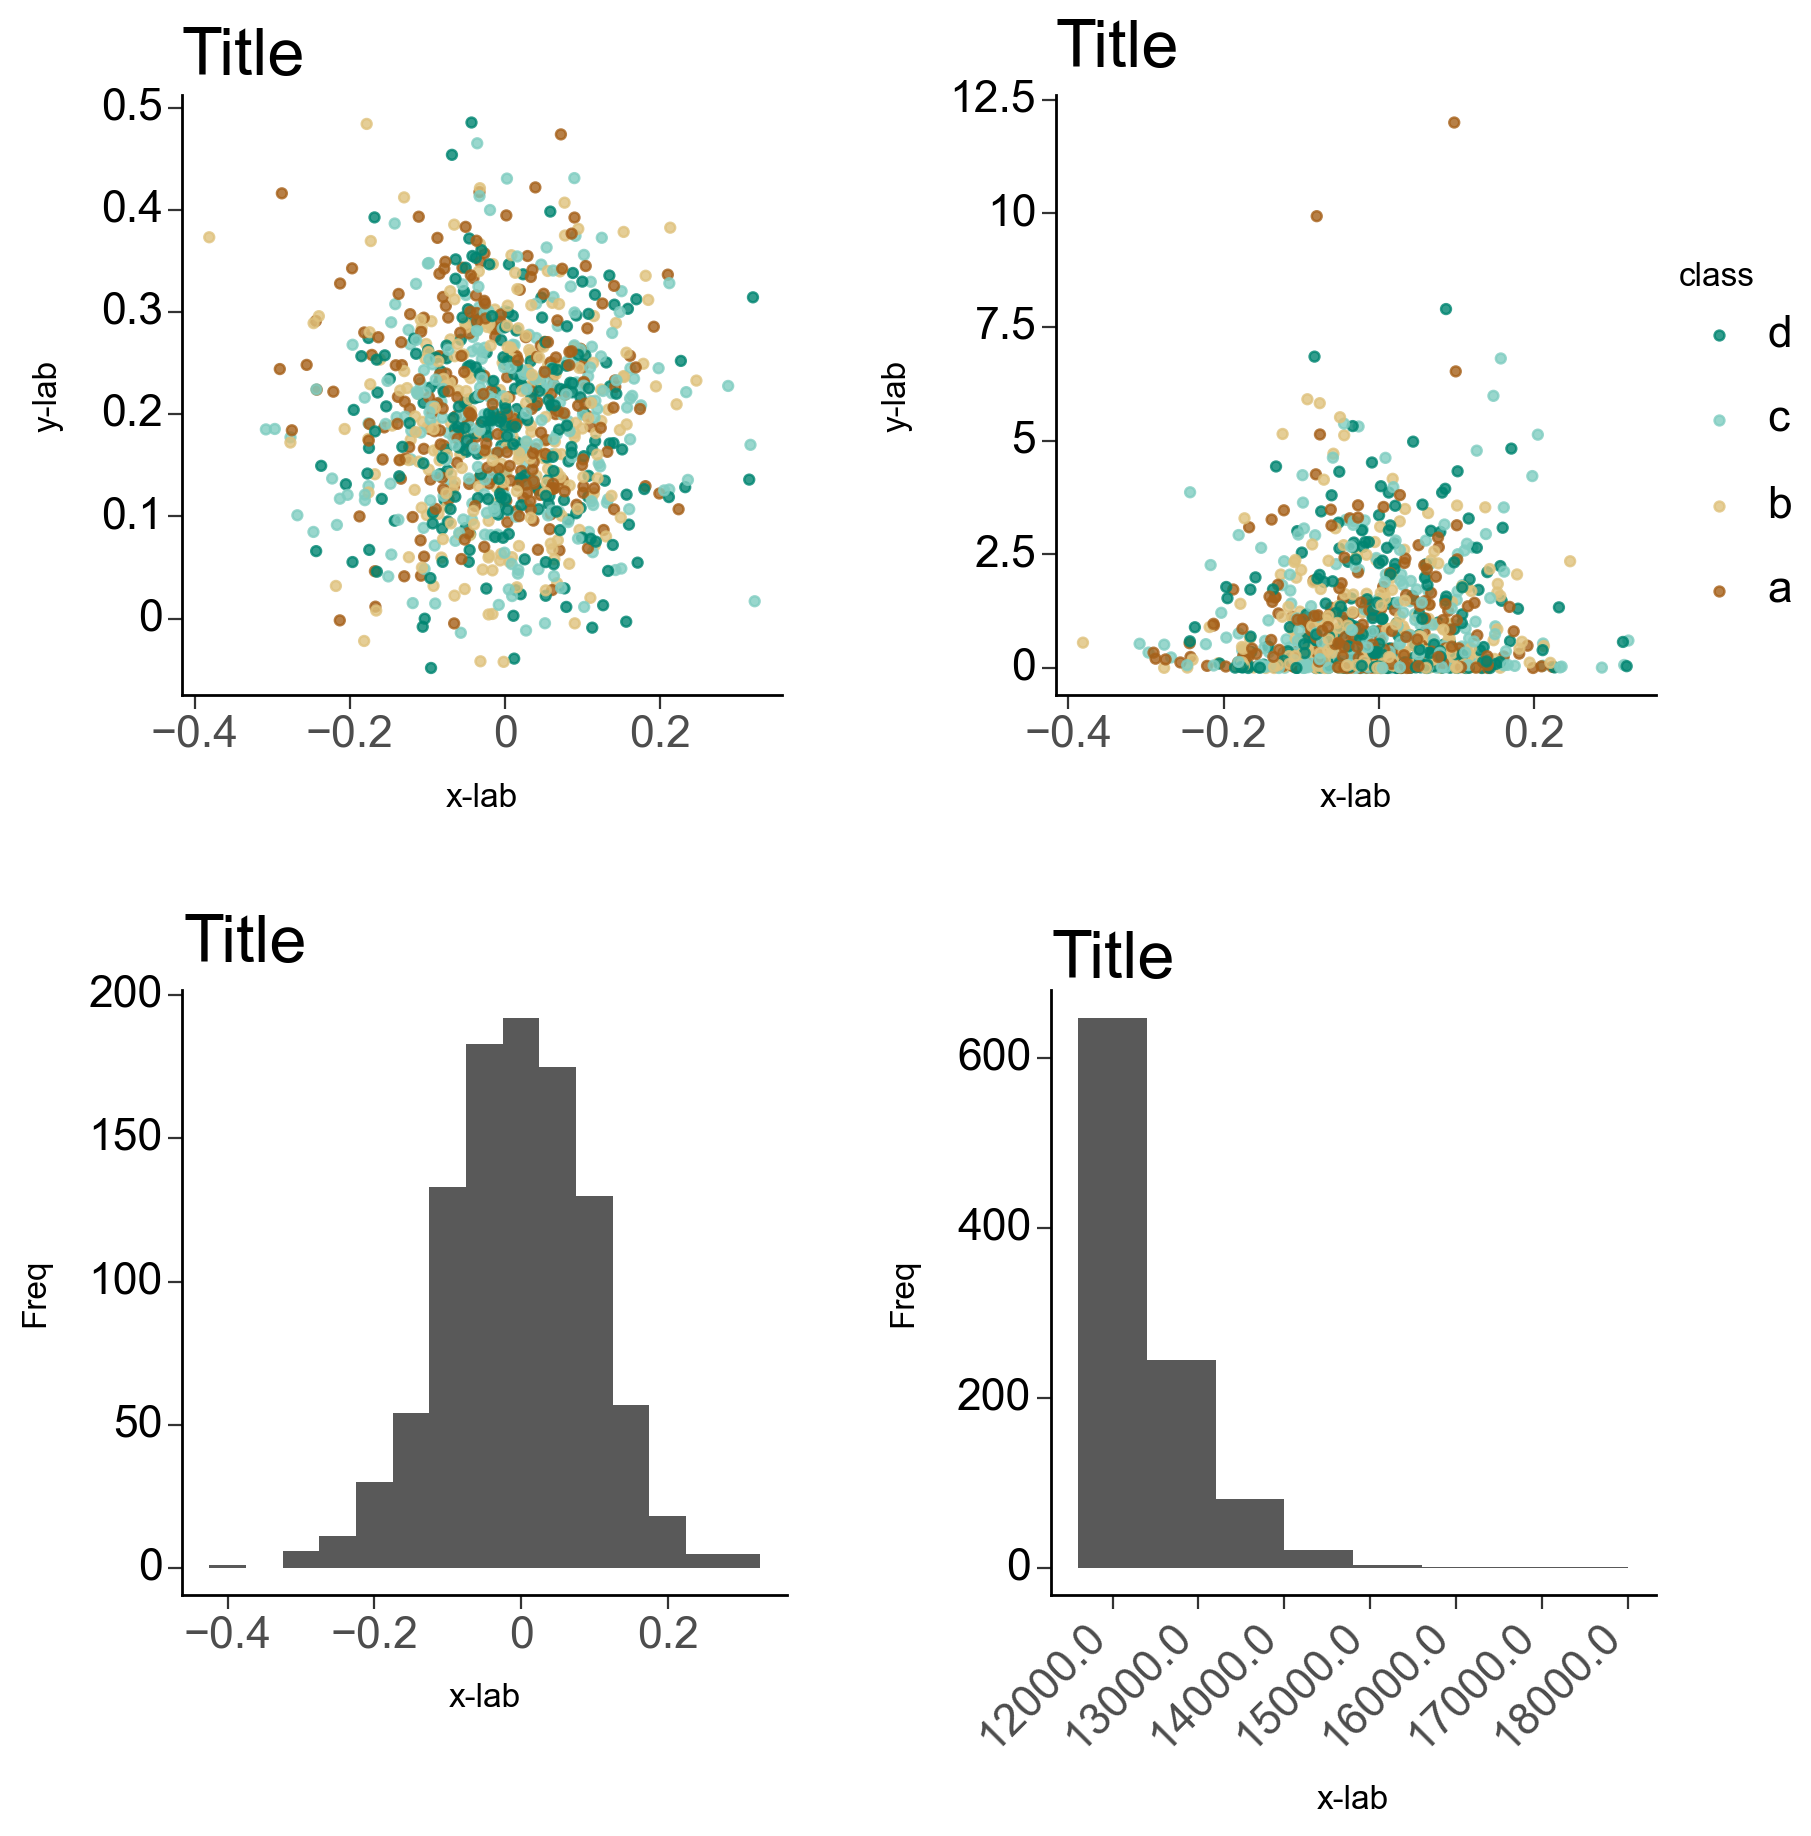

In [6]:
# combine plots with patchworklib
fig_lw = 3
pw1 = pw.load_ggplot(p1, figsize=(fig_lw,fig_lw))
pw2 = pw.load_ggplot(p2, figsize=(fig_lw,fig_lw))
pw3 = pw.load_ggplot(p3, figsize=(fig_lw,fig_lw))
pw4 = pw.load_ggplot(p4, figsize=(fig_lw,fig_lw))

pw_combine = ((pw1|pw2) / (pw3|pw4))
pw_combine

In [7]:
# save joint plot
p4.save('pw_combine.pdf', width=8, height=5)
p4.save('pw_combine.svg', width=8, height=5)
